In [ ]:
# Оригинальный код https://github.com/mtrencseni/playground/blob/master/Reducing%20variance.ipynb

In [1]:
import scipy
import numpy as np
from math import sqrt
from scipy import stats
from numpy import cov, linspace
from statistics import mean
from numpy.random import normal, exponential
import matplotlib.pyplot as plt
from random import random
%matplotlib inline

Simulating 1000 A/B tests, true treatment lift is 2...


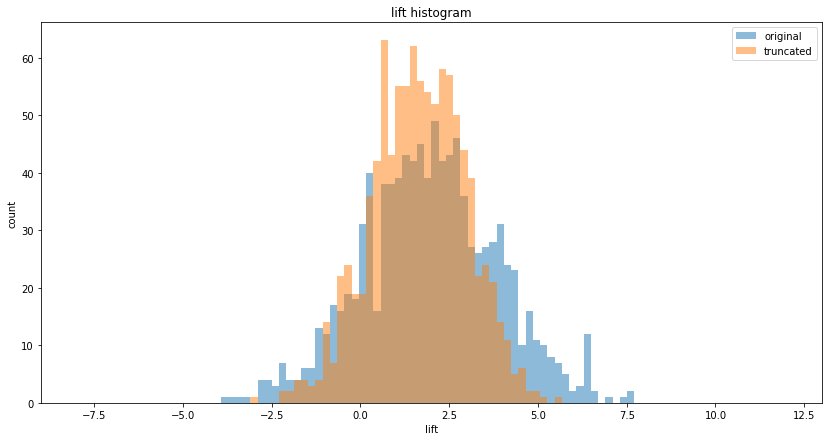

In [3]:
def lift(A, B):
    return mean(B) - mean(A)


def p_value(A, B):
    return stats.ttest_ind(A, B)[1]


def get_AB_samples(scale, treatment_lift, N):
    A = list(exponential(scale=scale                 , size=N))
    B = list(exponential(scale=scale + treatment_lift, size=N))
    # add outliers
    for i in range(int(N*0.001)):
        A.append(random()*scale*100)
        B.append(random()*scale*100 + treatment_lift)
    return A, B

N = 10*1000
scale = 100
treatment_lift = 2
num_simulations = 1000

print('Simulating %s A/B tests, true treatment lift is %d...' % (num_simulations, treatment_lift))

orig_lifts, trunc_lifts = [], []
for i in range(num_simulations):
    print('%d/%d' % (i, num_simulations), end='\r')
    A, B = get_AB_samples(scale, treatment_lift, N)
    orig_lifts.append(lift(A, B))
    A, B = [x for x in A if x < 5*scale], [x for x in B if x < 5*scale]
    trunc_lifts.append(lift(A, B))

bins = linspace(-8, 12, 99)
plt.figure(figsize=(14, 7))
plt.hist(orig_lifts, bins, alpha=0.5, label='original')
plt.hist(trunc_lifts, bins, alpha=0.5, label='truncated')
plt.xlabel('lift')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.title('lift histogram')
plt.show()